In [1]:
import nltk

In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import preprocessing
from scipy.spatial import cKDTree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pickle

In [435]:
fresh_books = pd.read_csv('data/FreshBooks.csv' , encoding='ISO-8859-1')
xero = pd.read_csv('data/Xero.csv' , encoding='ISO-8859-1')

In [436]:
fresh_books[0:5]

,message,created_time,id
0,Learn how to spot the inefficiencies!,2018-03-31T14:00:00+0000,5997996375_10155519473491376
1,Need an ally at tax time? You'll want to check...,2018-03-30T18:20:00+0000,5997996375_10155512851991376
2,"""The success of the project depends on how goo...",2018-03-30T14:09:00+0000,5997996375_10155512849566376
3,Don't let these invoicing mistakes cost you,2018-03-29T18:20:00+0000,5997996375_10155512753591376
4,"""Starting a virtual assistant business is one ...",2018-03-29T16:58:00+0000,5997996375_10155515334321376


In [437]:
xero[0:5]

,message,created_time,id,story
0,I'm looking for someone who understands Xero a...,2018-03-30T23:15:39+0000,119615178068730_1924787174218179,NaN
1,We're going live on Facebook next week with so...,2018-03-30T21:00:54+0000,119615178068730_1924683924228504,NaN
2,Really wish that customer support wasn't only ...,2018-03-30T16:29:38+0000,119615178068730_1924455494251347,NaN
3,Is it putting a smile on a customer's face? Is...,2018-03-30T04:00:31+0000,119615178068730_1923743127655917,NaN
4,Why can't I get anybody from Xero to contact m...,2018-03-29T20:01:48+0000,119615178068730_1923307347699495,NaN


In [438]:
fresh_books.describe()

,message,created_time,id
count,3285,3332,3332
unique,3231,3325,3331
top,http://www.freshbooks.com/blog/,2009-03-27T15:14:07+0000,5997996375_10152306452866376
freq,8,7,2


In [439]:
print(fresh_books.created_time.max())
print(xero.created_time.max())

2018-03-31T14:00:00+0000
2018-03-30T23:15:39+0000


In [440]:
print(fresh_books.created_time.min())
print(xero.created_time.min())

2006-02-02T08:00:00+0000
2010-05-12T21:02:28+0000


In [441]:
# find count of tweets by year
# extract year and month fileds
fresh_books['year'] = fresh_books['created_time'].str[0:4]
fresh_books['month'] = fresh_books['created_time'].str[5:7]
fresh_books['day'] = fresh_books['created_time'].str[8:10]

xero['year'] = xero['created_time'].str[0:4]
xero['month'] = xero['created_time'].str[5:7]
xero['day'] = xero['created_time'].str[8:10]

In [442]:
fresh_books[0:5]

,message,created_time,id,year,month,day
0,Learn how to spot the inefficiencies!,2018-03-31T14:00:00+0000,5997996375_10155519473491376,2018,03,31
1,Need an ally at tax time? You'll want to check...,2018-03-30T18:20:00+0000,5997996375_10155512851991376,2018,03,30
2,"""The success of the project depends on how goo...",2018-03-30T14:09:00+0000,5997996375_10155512849566376,2018,03,30
3,Don't let these invoicing mistakes cost you,2018-03-29T18:20:00+0000,5997996375_10155512753591376,2018,03,29
4,"""Starting a virtual assistant business is one ...",2018-03-29T16:58:00+0000,5997996375_10155515334321376,2018,03,29


In [443]:
xero[0:5]

,message,created_time,id,story,year,month,day
0,I'm looking for someone who understands Xero a...,2018-03-30T23:15:39+0000,119615178068730_1924787174218179,NaN,2018,03,30
1,We're going live on Facebook next week with so...,2018-03-30T21:00:54+0000,119615178068730_1924683924228504,NaN,2018,03,30
2,Really wish that customer support wasn't only ...,2018-03-30T16:29:38+0000,119615178068730_1924455494251347,NaN,2018,03,30
3,Is it putting a smile on a customer's face? Is...,2018-03-30T04:00:31+0000,119615178068730_1923743127655917,NaN,2018,03,30
4,Why can't I get anybody from Xero to contact m...,2018-03-29T20:01:48+0000,119615178068730_1923307347699495,NaN,2018,03,29


In [444]:
fresh_books.groupby('year').count()

,message,created_time,id,month,day
year,,,,,
2006,0,3,3,3,3
2007,0,2,2,2,2
2008,43,44,44,44,44
2009,143,145,145,145,145
2010,73,75,75,75,75
2011,92,102,102,102,102
2012,357,369,369,369,369
2013,275,278,278,278,278
2014,305,308,308,308,308


In [445]:
xero.groupby('year').count()

,message,created_time,id,story,month,day
year,,,,,,
2010,24,25,25,1,25,25
2011,224,246,246,10,246,246
2012,767,827,827,86,827,827
2013,645,656,656,52,656,656
2014,624,629,629,20,629,629
2015,605,605,605,16,605,605
2016,620,627,627,25,627,627
2017,660,669,669,36,669,669
2018,322,326,326,13,326,326


In [446]:
fresh_books = fresh_books[fresh_books['year'] >= '2010'] # pick same date range

In [447]:
fresh_books.groupby('year').count()

,message,created_time,id,month,day
year,,,,,
2010,73,75,75,75,75
2011,92,102,102,102,102
2012,357,369,369,369,369
2013,275,278,278,278,278
2014,305,308,308,308,308
2015,291,292,292,292,292
2016,735,737,737,737,737
2017,706,712,712,712,712
2018,265,265,265,265,265


In [448]:
# counting words

In [449]:
freshbook_messages = fresh_books['message']

In [450]:
xero_messages = xero['message']

In [451]:
freshbook_messages[0:5]

0                Learn how to spot the inefficiencies!
1    Need an ally at tax time? You'll want to check...
2    "The success of the project depends on how goo...
3          Don't let these invoicing mistakes cost you
4    "Starting a virtual assistant business is one ...
Name: message, dtype: object

In [452]:
xero_messages[0:5]

0    I'm looking for someone who understands Xero a...
1    We're going live on Facebook next week with so...
2    Really wish that customer support wasn't only ...
3    Is it putting a smile on a customer's face? Is...
4    Why can't I get anybody from Xero to contact m...
Name: message, dtype: object

In [453]:
all_words_fb = {}
lines = ''
one_string = ''
for line in freshbook_messages:
    #print(line)
    string = repr(line)
    one_string = one_string+string
    
print(one_string)

'Learn how to spot the inefficiencies!'"Need an ally at tax time? You'll want to check out these apps"'"The success of the project depends on how good your planning is. The good news is that project planning isn\x92t hard"'"Don't let these invoicing mistakes cost you"'"Starting a virtual assistant business is one of the most low-cost businesses to start online"''"Millions of workers are happily leaving corporations and becoming self-employed, according to FreshBooks\x92 second annual Self-Employment Report." via New York Post'"First a new UI change - now WePay halts withdrawal and requests more information.\r\n\r\nWhat I as a customer want is a service that works \x96 uninterrupted, unchanged. I don't want to be shoveled new updates or have your third parties pester me because they've identified their own risks later in the process.\r\n\r\nIf there were a time to add a checkbox that says, 'I don't want anything new and I just want this to function forever, always, the same way it has' 

In [454]:
type(one_string)
import re
one_string = re.sub(r'[^\w]', ' ', one_string.lower())

In [455]:
#lines)
all_words = one_string.split()

In [456]:
all_words[0:6]

['learn', 'how', 'to', 'spot', 'the', 'inefficiencies']

In [457]:
len(all_words)

81956

In [458]:
unique_words = set(all_words)

In [459]:
len(unique_words)

8360

In [460]:
type(unique_words)

set

In [461]:
word_counter = dict.fromkeys(unique_words,0)

In [462]:
word_counter

{'fears': 0,
 'practice': 0,
 'gret': 0,
 'vocal': 0,
 'processes': 0,
 'teams': 0,
 'reported': 0,
 'shocked': 0,
 'abode': 0,
 'stellar': 0,
 'x9760': 0,
 'delight': 0,
 'pipeline': 0,
 'attempt': 0,
 '10arqa': 0,
 'yottabyte': 0,
 'lived': 0,
 'achieving': 0,
 'boatloads': 0,
 'responsibility': 0,
 '718': 0,
 'under': 0,
 'obstacles': 0,
 'opt': 0,
 'evaluate': 0,
 'case': 0,
 'values': 0,
 'w4azsq': 0,
 'donating': 0,
 'wing': 0,
 'fixed': 0,
 'families': 0,
 'dozen': 0,
 'huh': 0,
 'harrington': 0,
 '19th': 0,
 'hiding': 0,
 'humorous': 0,
 'apart': 0,
 'y': 0,
 'lick': 0,
 'compliant': 0,
 'alex': 0,
 'convenient': 0,
 'leaning': 0,
 'mum': 0,
 'fireworks': 0,
 'sampler': 0,
 '8yiih': 0,
 'bespectacled': 0,
 'tweeted': 0,
 'funnel': 0,
 'brainleaf': 0,
 'desk': 0,
 'staff': 0,
 'nouse': 0,
 'chair': 0,
 'overlooked': 0,
 'soooo': 0,
 'paper': 0,
 'nice': 0,
 'supervisor': 0,
 'youngstown': 0,
 'convoluted': 0,
 'y5k9e': 0,
 'efficiency': 0,
 'st': 0,
 'themed': 0,
 'clouds': 0,
 

In [463]:
for word in all_words:
    if word in word_counter:
        word_counter[word]+=1

In [464]:
word_counter

{'fears': 5,
 'practice': 4,
 'gret': 1,
 'vocal': 1,
 'processes': 1,
 'teams': 8,
 'reported': 2,
 'shocked': 1,
 'abode': 1,
 'stellar': 5,
 'x9760': 1,
 'delight': 4,
 'pipeline': 6,
 'attempt': 2,
 '10arqa': 1,
 'yottabyte': 2,
 'lived': 2,
 'achieving': 1,
 'boatloads': 1,
 'responsibility': 1,
 '718': 1,
 'under': 12,
 'obstacles': 6,
 'opt': 1,
 'evaluate': 2,
 'case': 16,
 'values': 3,
 'w4azsq': 1,
 'donating': 1,
 'wing': 1,
 'fixed': 4,
 'families': 1,
 'dozen': 2,
 'huh': 1,
 'harrington': 1,
 '19th': 1,
 'hiding': 2,
 'humorous': 1,
 'apart': 1,
 'y': 12,
 'lick': 1,
 'compliant': 1,
 'alex': 1,
 'convenient': 1,
 'leaning': 1,
 'mum': 1,
 'fireworks': 1,
 'sampler': 1,
 '8yiih': 1,
 'bespectacled': 1,
 'tweeted': 2,
 'funnel': 1,
 'brainleaf': 1,
 'desk': 5,
 'staff': 10,
 'nouse': 1,
 'chair': 1,
 'overlooked': 1,
 'soooo': 1,
 'paper': 7,
 'nice': 20,
 'supervisor': 4,
 'youngstown': 1,
 'convoluted': 1,
 'y5k9e': 1,
 'efficiency': 2,
 'st': 3,
 'themed': 1,
 'clouds':

In [465]:
# sorting by value
import operator
sorted_count = sorted(word_counter.items(), key=operator.itemgetter(1), reverse=True)

In [466]:
sorted_count

[('the', 2584),
 ('to', 2579),
 ('a', 1829),
 ('r', 1803),
 ('you', 1656),
 ('and', 1567),
 ('your', 1316),
 ('of', 1148),
 ('freshbooks', 1080),
 ('for', 1061),
 ('i', 998),
 ('n', 962),
 ('it', 848),
 ('in', 840),
 ('is', 771),
 ('on', 660),
 ('s', 613),
 ('business', 605),
 ('with', 560),
 ('that', 509),
 ('how', 508),
 ('this', 450),
 ('we', 443),
 ('are', 433),
 ('can', 432),
 ('have', 406),
 ('be', 405),
 ('out', 383),
 ('our', 371),
 ('http', 366),
 ('from', 366),
 ('my', 348),
 ('at', 338),
 ('what', 328),
 ('time', 317),
 ('t', 315),
 ('do', 310),
 ('all', 292),
 ('new', 286),
 ('here', 274),
 ('more', 270),
 ('com', 268),
 ('an', 261),
 ('get', 249),
 ('just', 238),
 ('not', 237),
 ('as', 237),
 ('ly', 237),
 ('up', 236),
 ('so', 234),
 ('by', 230),
 ('but', 228),
 ('small', 223),
 ('when', 217),
 ('about', 214),
 ('bit', 211),
 ('work', 210),
 ('if', 203),
 ('us', 202),
 ('love', 198),
 ('or', 196),
 ('one', 192),
 ('blog', 186),
 ('re', 177),
 ('there', 177),
 ('help', 174)

In [467]:
from wordcloud import WordCloud?

In [ ]:
from wordcloud import WordCloud

In [468]:
from wordcloud import WordCloud

In [469]:
from wordcloud import WordCloud

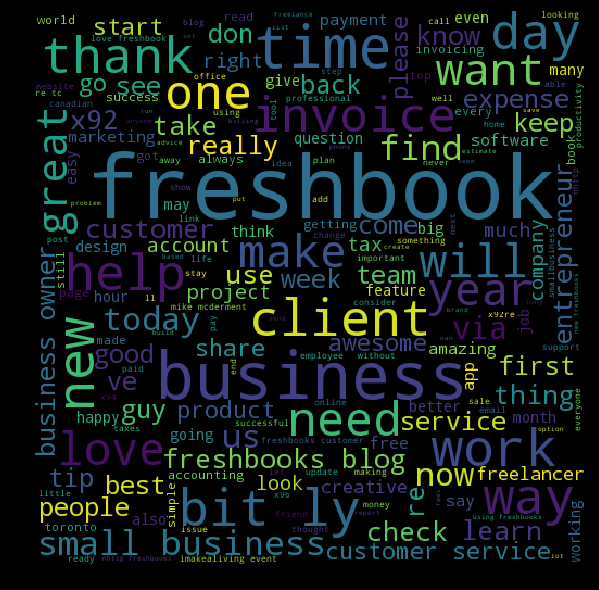

In [470]:
all_words = one_string
all_wc = WordCloud(width = 512,height=512).generate(all_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(all_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [471]:
all_words_fb = {}
lines = ''
one_string_xo = ''
for line in xero_messages:
    #print(line)
    string = repr(line)
    one_string_xo = one_string_xo+string
    
#print(one_string_xo)

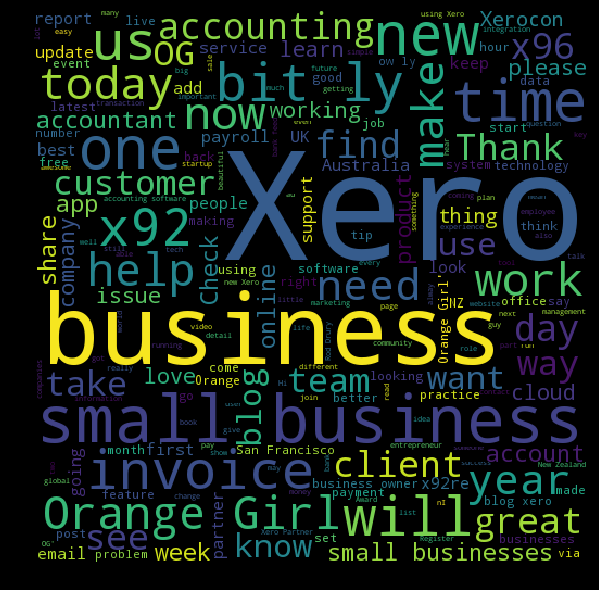

In [472]:
all_words = one_string_xo
all_wc = WordCloud(width = 512,height=512).generate(all_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(all_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [473]:
# FIND SENTIMENT # RE DO EVERYTHING FROM FILE READING USING PYTHIN THIS TIME

file = open("data/tweet_sentiments.txt")
text = file.read().split('\n')
lines = text

In [474]:
sentiments = pd.read_csv('data/tweet_sentiments.txt' ,sep="\t", encoding='ISO-8859-1')

In [475]:
sentiments.columns = ['sentiment','tweet']

In [476]:
sentiments[0:5]

,sentiment,tweet
0,1,this was the first clive cussler i've ever rea...
1,1,i liked the Da Vinci Code a lot.
2,1,i liked the Da Vinci Code a lot.
3,1,I liked the Da Vinci Code but it ultimatly did...
4,1,that's not even an exaggeration ) and at midni...


In [477]:
sentiments.shape

(6930, 2)

In [478]:
sentiments.head(5)

,sentiment,tweet
0,1,this was the first clive cussler i've ever rea...
1,1,i liked the Da Vinci Code a lot.
2,1,i liked the Da Vinci Code a lot.
3,1,I liked the Da Vinci Code but it ultimatly did...
4,1,that's not even an exaggeration ) and at midni...


In [479]:
sentiments.tail(5)

,sentiment,tweet
6925,0,slow response.
6926,0,not happy.
6927,0,very slow.
6928,0,downtime really hurts.
6929,0,downtime response.



Create a dictionary of features¶

    Create a dictionary of features and then count the feature values for each sentence
    All words available in all sentences become part of the dictionary
    We will limit number of features to be used in this tutorial to 5000



In [480]:
from sklearn.feature_extraction.text import CountVectorizer
#Convert a collection of text documents to a matrix of token counts


In [481]:
count_vectorizer = CountVectorizer( max_features = 8000 )

In [482]:
feature_vector = count_vectorizer.fit(sentiments.tweet)
train_ds_features = count_vectorizer.transform( sentiments.tweet )

In [483]:
features = feature_vector.get_feature_names()

In [484]:
features[0:10]

['00', '007', '10', '10pm', '12', '16', '17', '1984', '1st', '200']

In [485]:
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )

In [486]:
feature_counts = pd.DataFrame( dict( features = features,
                                  counts = features_counts ) )

In [487]:
feature_counts.head(5)

,counts,features
0,1,00
1,1,007
2,4,10
3,1,10pm
4,1,12


In [488]:
feature_counts.sort_values( "counts", ascending = False )[1:5]

,counts,features
92,2154,and
1467,2093,potter
864,2093,harry
1273,2000,mountain


The features list contains quite a few stop words, which may have no meaning. Let's remove the words and create a new dictionary

In [489]:
count_vectorizer = CountVectorizer( stop_words = "english",
                                 max_features = 8000 )
feature_vector = count_vectorizer.fit( sentiments.tweet )
train_ds_features = count_vectorizer.transform( sentiments.tweet )

In [490]:
features = feature_vector.get_feature_names()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features,
                                  counts = features_counts ) )
feature_counts.sort_values( "counts", ascending = False )[0:10]

,counts,features
1329,2093,potter
790,2093,harry
313,2000,code
222,2000,brokeback
1168,2000,mountain
1825,1999,vinci
398,1999,da
1075,1624,love
125,1126,awesome
1151,1094,mission


In [491]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

In [492]:
train_ds_labels = sentiments.sentiment.values

In [493]:
train_ds_labels

array([1, 1, 1, ..., 0, 0, 0])

In [494]:
gnbc = GaussianNB()

In [495]:
train_X, test_X, train_y, test_y = train_test_split( train_ds_features,
                                                  train_ds_labels,
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [496]:
gnbc.fit( train_X.toarray(), train_y )

GaussianNB(priors=None)

In [497]:
test_ds_predicted = gnbc.predict( test_X.toarray() )

In [498]:
from sklearn import metrics
cm = metrics.confusion_matrix( test_y, test_ds_predicted )

In [499]:
cm

array([[563,   8],
       [172, 643]])

In [500]:
score = metrics.accuracy_score( test_y, test_ds_predicted )
score

0.87012987012987009

In [501]:
test_y[0:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [502]:
test_ds_predicted[0:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [503]:
# NOW PASS THE FRESHBOOKS AND XERO MESSAGES TO INFER THE SENTIMENTS


## EXAMPLE READING JSON FILE

# read the entire file into a python array 
with open('azhar.json', 'r') as f:
  data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data) + "]"
azhar_df = pd.read_json(data_json_str)
azhar_df.head( 1 )

In [504]:
fresh_books[0:3]

,message,created_time,id,year,month,day
0,Learn how to spot the inefficiencies!,2018-03-31T14:00:00+0000,5997996375_10155519473491376,2018,03,31
1,Need an ally at tax time? You'll want to check...,2018-03-30T18:20:00+0000,5997996375_10155512851991376,2018,03,30
2,"""The success of the project depends on how goo...",2018-03-30T14:09:00+0000,5997996375_10155512849566376,2018,03,30


In [505]:
xero[0:3]

,message,created_time,id,story,year,month,day
0,I'm looking for someone who understands Xero a...,2018-03-30T23:15:39+0000,119615178068730_1924787174218179,NaN,2018,03,30
1,We're going live on Facebook next week with so...,2018-03-30T21:00:54+0000,119615178068730_1924683924228504,NaN,2018,03,30
2,Really wish that customer support wasn't only ...,2018-03-30T16:29:38+0000,119615178068730_1924455494251347,NaN,2018,03,30


In [515]:
fresh_book_messages = fresh_books[['message']]
xero_messages = xero[['message']]

In [516]:
fresh_book_messages = fresh_book_messages.dropna()
xero_messages =  xero_messages.dropna()

In [517]:
type(fresh_book_messages)

pandas.core.frame.DataFrame

In [518]:
fresh_book_text = count_vectorizer.transform( fresh_book_messages.message )
xero_text = count_vectorizer.transform( xero_messages.message )

In [519]:
fresh_book_text.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [520]:
fresh_book_messages["predicted_sentiment"] = gnbc.predict(fresh_book_text.toarray())
xero_messages["predicted_sentiment"] = gnbc.predict(xero_text.toarray())

In [521]:
fresh_book_messages[0:20]

,message,predicted_sentiment
0,Learn how to spot the inefficiencies!,1
1,Need an ally at tax time? You'll want to check...,0
2,"""The success of the project depends on how goo...",0
3,Don't let these invoicing mistakes cost you,0
4,"""Starting a virtual assistant business is one ...",1
5,"""Millions of workers are happily leaving corpo...",0
6,First a new UI change - now WePay halts withdr...,0
7,I was wondering if anyone else is seeing error...,0
8,Want a weekly serving of small business goodne...,1
9,Effective teamwork is golden. Here's how to ma...,0


In [522]:
xero_messages[0:20]

,message,predicted_sentiment
0,I'm looking for someone who understands Xero a...,0
1,We're going live on Facebook next week with so...,0
2,Really wish that customer support wasn't only ...,0
3,Is it putting a smile on a customer's face? Is...,1
4,Why can't I get anybody from Xero to contact m...,0
5,I have been trialling this accounting software...,0
6,Sophie Andrews from The Accounts Studio discu...,0
7,Why do small businesses in the ACT and Tasmani...,1
8,Time flies when you're running your own busine...,0
9,Whip your financial year into shape ?? 12 mont...,0


In [523]:
fresh_book_messages.to_csv('freshbooks_post_prediction.csv')

In [524]:
xero_messages.to_csv('xero_post_prediction.csv')